Values:

PBOC chart: $K_m = 60 \mu M$ 
Howard paper: $K_{atp} = 28$ µM, $K_{adp} = 35$ µM, $K_{P}=9$ mM 
NCD Values: 

# Imports

In [27]:
#Numpy
import numpy as np

#For image plotting
import skimage.io

#Matplotlib plotting packages
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
from matplotlib import pyplot as plt, ticker as mticker
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)
import re

# For loading bars
from tqdm.notebook import tqdm as tqdm

import pandas as pd

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.widgets import Slider, Button
# %matplotlib inline
# from matplotlib.colors import Normalize
# import matplotlib.cm as cm
# import seaborn as sns
# rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
#     'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
# sns.set(rc=rc)

# from matplotlib.colors import LogNorm
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import matplotlib.cm as cm

# import glob as glob
# import re
# import os

# import scipy.optimize

# import skimage.io
# import skimage.filters
# import skimage.morphology
# import skimage.transform

# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets

# import pandas as pd

# from tqdm.notebook import tqdm as tqdm

# import panel as pn
# pn.extension()


In [28]:
rc = {'lines.linewidth': 1.25,
          'axes.labelsize': 16, # Modified originally 8
          'axes.titlesize': 18, # Modified originally 9
          'axes.facecolor': '#E3DCD0',
          'xtick.labelsize': 14, # Modified originally 7
          'ytick.labelsize': 14, # Modified originally 7
          #'font.family': 'Lucida Sans Unicode',
          'grid.linestyle': '-',
          'grid.linewidth': 0.5,
          'grid.color': '#ffffff',
           'legend.fontsize': 8,
           'figure.dpi': 300,
           'savefig.dpi': 300
     }

plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
plt.rc('xtick.major', pad=-1)
plt.rc('ytick.major', pad=-1)
plt.rc('mathtext', fontset='stixsans', sf='sansserif')
plt.rc('figure', figsize=[7, 5]) # Modified originally figsize=[3.5, 2.5]
plt.rc('svg', fonttype='none')
plt.rc('legend', title_fontsize='8', frameon=True, 
        facecolor='#E3DCD0', framealpha=1)
sns.set_style('darkgrid', rc=rc)
sns.set_palette("colorblind", color_codes=True)
sns.set_context('notebook', rc=rc)

# No Diffusion, only reaction ATP depletion

### Single gamma curve

  0%|          | 0/999 [00:00<?, ?it/s]

(-10.0, 510.0)

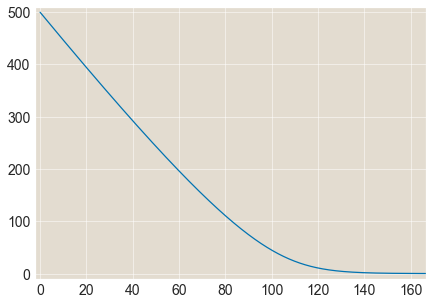

In [29]:
m0 = 1 #µM
K = 60 #µM
gamma = 0.1 # 1/s
ATP0 = 500 #µM

deltat = 10 # s
tottime = 10000 #s
time = np.linspace(0, tottime, int(tottime/deltat)) # s

ATP = np.zeros(len(time))
ATP[0] += ATP0

for i, t in enumerate(tqdm(time[:-1])):
    ATPupdate = ATP[i] - (deltat*gamma*m0*ATP[i])/(ATP[i]+K)
    if ATPupdate > 0:
        ATP[i+1] += ATPupdate
plt.plot(time/60, ATP)

plt.xlim(-2, tottime/60)
plt.ylim(-10, ATP0 + 10)

### Range of Gammas

  0%|          | 0/10 [00:00<?, ?it/s]

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

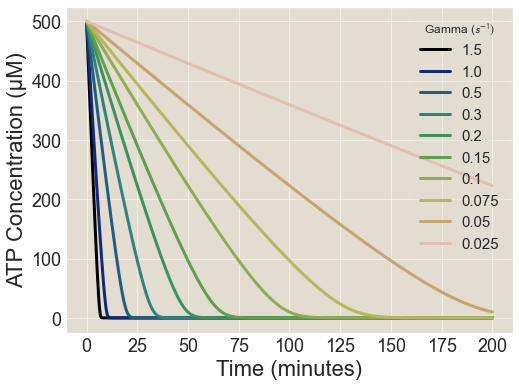

In [48]:
m0 = 1 #µM
K = 28 #µM
gammarange = np.array([1.5, 1.0, 0.5, 0.3, 0.2, 0.15, 0.1, 0.075, 0.05, 0.025]) #0.1 # 1/s
ATP0 = 500 #µM

deltat = 10 # s
tottime = 12000 #s
time = np.linspace(0, tottime, int(tottime/deltat)) # s

# setup the normalization and the colormap
normalize = mcolors.Normalize(vmin=0, vmax=len(gammarange))
colormap = cm.gist_earth
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)


fig, ax = plt.subplots(figsize=(8,6))

for index, gamma in enumerate(tqdm(gammarange)):
    ATP = np.zeros(len(time))
    ATP[0] += ATP0
    for i, t in enumerate(time[:-1]):
        ATPupdate = ATP[i] - (deltat*gamma*m0*ATP[i])/(ATP[i]+K)
        if ATPupdate > 0:
            ATP[i+1] += ATPupdate
    ax.plot(time/60, ATP, linewidth = 3, color=colormap(normalize(index)), label = gamma)   
    ax.legend(title = 'Gamma ($s^{-1})$',  fontsize = 15, framealpha=0.1)
ax.set_xlabel('Time (minutes)', fontsize = 22)
ax.set_ylabel('ATP Concentration (µM)', fontsize = 22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('log');
#plt.ylim(1, 10**3)
#fig.savefig('ATP vs Time, Gamma sweep', dpi=300)
              
# color_bar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.75])
# cbar = fig.colorbar(scalarmappable, cax=color_bar_ax, extend = )
# cbar.ax.tick_params(labelsize=25)
# cbar.set_label(label="Times (min)", size=30, weight='bold')

# ax.set_xlim(-2, tottime/60)
# ax.set_ylim(-10, ATP0 + 10)

### time to get to zero vs gamma fitted to 1/gamma

  0%|          | 0/71 [00:00<?, ?it/s]

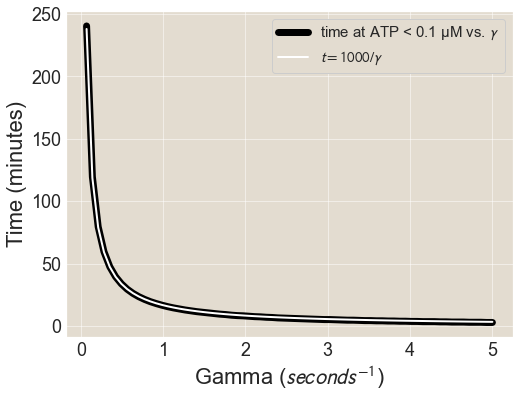

In [33]:
m0 = 1 #µM
K = 60 #µM
gammamin = 0.07
gammamax = 5
gammarange = np.linspace(gammamin, gammamax, int(1+(gammamax-gammamin)/gammamin)) #0.1 # 1/s
gamma_zero_time = np.zeros(len(gammarange))
ATP0 = 500 #µM

deltat = 10 # s
tottime = 15000 #s
time = np.linspace(0, tottime, int(tottime/deltat)) # s

for index, gamma in enumerate(tqdm(gammarange)):
    ATP = np.zeros(len(time))
    ATP[0] += ATP0
    for i, t in enumerate(time[:-1]):
        ATPupdate = ATP[i] - (deltat*gamma*m0*ATP[i])/(ATP[i]+K)
        if ATPupdate > 0:
            ATP[i+1] += ATPupdate
    if len(np.where(ATP<0.1)[0])>0:
        gamma_zero_time[index] += time[np.where(ATP<0.1)[0][0]]
        
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(gammarange,  gamma_zero_time/60, linewidth = 7, color = 'black', label = 'time at ATP < 0.1 µM vs. $\gamma$')   
ax.plot(gammarange, (1000/gammarange)/60, linewidth = 2, color = 'white', label = '$t = 1000/\gamma$')
#ax.legend(title = 'Gamma', bbox_to_anchor=(1, 1), fontsize = 15)
ax.set_xlabel('Gamma ($seconds^{-1}$)', fontsize = 22)
ax.set_ylabel('Time (minutes)', fontsize = 22)
ax.legend(fontsize = 15)
plt.xticks(fontsize=18, )
plt.yticks(fontsize=18);
#fig.savefig('Gamma vs time', dpi=300)

### Several gamma in subplots

Text(0.02, 0.5, 'Concentration (µM)')

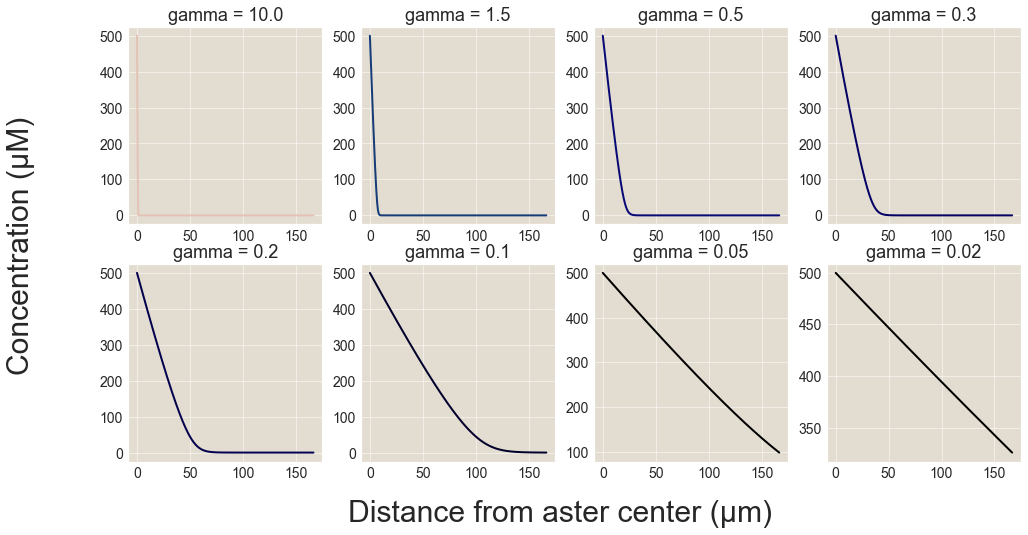

In [34]:
m0 = 1 #µM
K = 60 #µM
gamma = np.array([[10, 1.5, 0.5, 0.3],[0.2, 0.1, 0.05, 0.02]]) #np.linspace(0.05, 1.5, 30) #0.1 # 1/s
ATP0 = 500 #µM

deltat = 10 # s
tottime = 10000 #s
time = np.linspace(0, tottime, int(tottime/deltat)) # s

# setup the normalization and the colormap
normalize = mcolors.Normalize(vmin=gamma.min(), vmax=1.1*gamma.max())
colormap = cm.gist_earth

fig, ax = plt.subplots(2,4, figsize=(16,8))

for i in range(2):
    for j in range(4):
        ATP = np.zeros(len(time))
        ATP[0] += ATP0
        for t, timevalue in enumerate(time[:-1]):
            ATPupdate = ATP[t] - (deltat*gamma[i][j]*m0*ATP[t])/(ATP[t]+K)
            if ATPupdate > 0:
                ATP[t+1] += ATPupdate
        ax[i][j].plot(time/60, ATP, linewidth = 2, color=colormap(normalize(gamma[i][j])))
        ax[i][j].set_title('gamma = ' + str(gamma[i][j]))

fig.supxlabel('Distance from aster center (µm)', fontsize=30)
fig.supylabel('Concentration (µM)', fontsize=30)            
# ax.set_xlim(-2, tottime/60)
# ax.set_ylim(-10, ATP0 + 10)

# Include ADP

$$\frac{\partial ATP}{\partial t} = \gamma m_0 \frac{ATP}{K+ATP+ADP}$$

  0%|          | 0/10 [00:00<?, ?it/s]

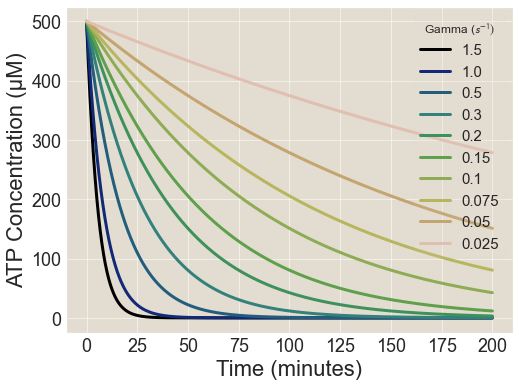

In [49]:
m0 = 1 #µM
K = 28 #µM
Katp = 28.7
Kadp = 33.1
gammarange = np.array([1.5, 1.0, 0.5, 0.3, 0.2, 0.15, 0.1, 0.075, 0.05, 0.025]) #0.1 # 1/s
ATP0 = 500 #µM
ADP0 = 0 #µM

deltat = 10 # s
tottime = 12000 #s
time = np.linspace(0, tottime, int(tottime/deltat)) # s

# setup the normalization and the colormap
normalize = mcolors.Normalize(vmin=0, vmax=len(gammarange))
colormap = cm.gist_earth
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)


fig, ax = plt.subplots(figsize=(8,6))

for index, gamma in enumerate(tqdm(gammarange)):
    ATP = np.zeros(len(time))
    ADP = np.zeros(len(time))
    ATP[0] += ATP0
    ADP[0] += ADP0
    for i, t in enumerate(time[:-1]):
        ATPupdate = ATP[i] - (deltat*gamma*m0*ATP[i]/Katp)/(ATP[i]/Katp+ ADP[i]/Kadp +1)
        ADPupdate = ADP[i] + (deltat*gamma*m0*ATP[i]/Katp)/(ATP[i]/Katp+ ADP[i]/Kadp +1)
        if ATPupdate > 0:
            ATP[i+1] += ATPupdate
            ADP[i+1] += ADPupdate
    ax.plot(time/60, ATP, linewidth = 3, color=colormap(normalize(index)), label = gamma)   
    ax.legend(title = 'Gamma ($s^{-1})$',  fontsize = 15, framealpha=0.1)
ax.set_xlabel('Time (minutes)', fontsize = 22)
ax.set_ylabel('ATP Concentration (µM)', fontsize = 22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);
#fig.savefig('ATP vs Time, Gamma sweep', dpi=300)
              
# color_bar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.75])
# cbar = fig.colorbar(scalarmappable, cax=color_bar_ax, extend = )
# cbar.ax.tick_params(labelsize=25)
# cbar.set_label(label="Times (min)", size=30, weight='bold')

# ax.set_xlim(-2, tottime/60)
# ax.set_ylim(-10, ATP0 + 10)